# Part 1：数据清洗与探索性分析（EDA）

本 Notebook 完成作业 Part 1，主要内容包括：

1. 加载用户数据与事件数据  
2. 数据清洗（时间格式、缺失值、重复值、异常值检查）  
3. 探索性数据分析（年龄、性别、事件类型、活跃趋势）  
4. 用户行为与用户属性的关联分析


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 1. 加载数据

读取 `users.csv` 与 `events.csv`，并查看数据规模。


In [3]:
users = pd.read_csv("../data/users.csv")
events = pd.read_csv("../data/events.csv")

print("Users shape:", users.shape)
print("Events shape:", events.shape)

users.head()


Users shape: (100, 6)
Events shape: (1858, 3)


,user_id,name,email,age,gender,signup_date
0,user_001,Anthony Miller,vsmith@yahoo.com,56,Female,2025-05-03
1,user_002,Catherine Torres,katie12@lawrence.com,46,Male,2025-03-26
2,user_003,Leslie Smith,morrowshannon@yahoo.com,32,Male,2025-05-01
3,user_004,Jamie Warner,maria50@monroe.com,25,Male,2025-04-22
4,user_005,Laura Wells,shelbyramirez@gutierrez-gould.net,38,Female,2025-03-09


In [4]:
events.head()


,user_id,event_type,timestamp
0,user_001,logout,2025/4/16 19:16
1,user_001,login,2025/5/6 4:34
2,user_001,click_ad,2025/4/19 22:00
3,user_001,login,2025/5/6 22:01
4,user_001,view_content,2025/4/22 16:21



## 2. 基本信息与缺失值检查

查看字段类型（dtypes）、缺失值情况、基本描述统计，评估数据质量。



In [5]:
print("=== Users info ===")
users.info()

print("\n=== Events info ===")
events.info()

print("\nUsers missing values:\n", users.isnull().sum())
print("\nEvents missing values:\n", events.isnull().sum())



=== Users info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      100 non-null    object
 1   name         100 non-null    object
 2   email        100 non-null    object
 3   age          100 non-null    int64 
 4   gender       100 non-null    object
 5   signup_date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB

=== Events info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     1858 non-null   object
 1   event_type  1858 non-null   object
 2   timestamp   1858 non-null   object
dtypes: object(3)
memory usage: 43.7+ KB

Users missing values:
 user_id        0
name           0
email          0
age            0
gender         0
signup_date    0
dtype:

## 3. 数据清洗：时间格式与异常值

将 `signup_date` 与 `timestamp` 转为日期时间格式，并检查年龄、性别字段是否存在异常值。


In [6]:
users['signup_date'] = pd.to_datetime(users['signup_date'])
events['timestamp'] = pd.to_datetime(events['timestamp'])

print(users.dtypes)
print(events.dtypes)


user_id                object
name                   object
email                  object
age                     int64
gender                 object
signup_date    datetime64[ns]
dtype: object
user_id               object
event_type            object
timestamp     datetime64[ns]
dtype: object


In [7]:
print("Age min/max:", users['age'].min(), users['age'].max())
print("Gender unique:", users['gender'].unique())
print("Event types:", events['event_type'].unique())


Age min/max: 18 59
Gender unique: ['Female' 'Male' 'Other']
Event types: ['logout' 'login' 'click_ad' 'view_content' 'purchase']


## 4. 用户基本画像：年龄与性别分布

分析用户性别比例与年龄分布。


Male      49
Female    44
Other      7
Name: gender, dtype: int64


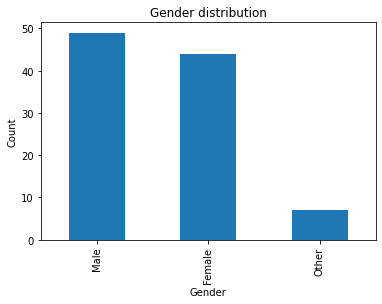

In [8]:
gender_counts = users['gender'].value_counts()
print(gender_counts)

gender_counts.plot(kind='bar')
plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


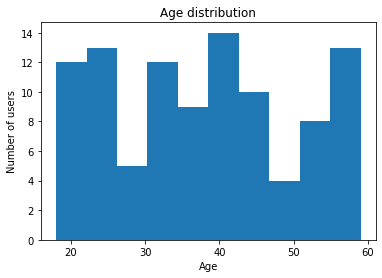

In [9]:
plt.hist(users['age'], bins=10)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.show()


## 5. 用户行为日志分析：事件类型与活跃趋势

探索 `events.csv`，包括事件类型分布、每天的事件数量趋势、用户活跃度分布。


purchase        380
click_ad        375
logout          369
login           367
view_content    367
Name: event_type, dtype: int64


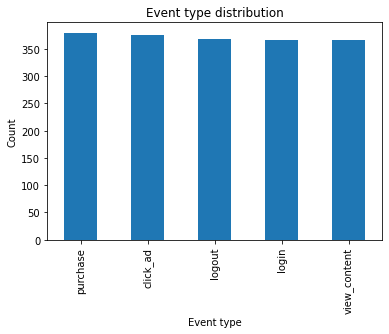

In [10]:
event_type_counts = events['event_type'].value_counts()
print(event_type_counts)

event_type_counts.plot(kind='bar')
plt.title("Event type distribution")
plt.xlabel("Event type")
plt.ylabel("Count")
plt.show()


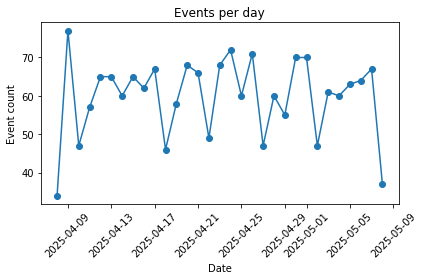

In [11]:
events['date'] = events['timestamp'].dt.date

events_per_day = events.groupby('date').size()

events_per_day.plot(kind='line', marker='o')
plt.title("Events per day")
plt.xlabel("Date")
plt.ylabel("Event count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


count    100.000000
mean      18.580000
std        7.908798
min        5.000000
25%       12.000000
50%       19.000000
75%       26.000000
max       30.000000
dtype: float64


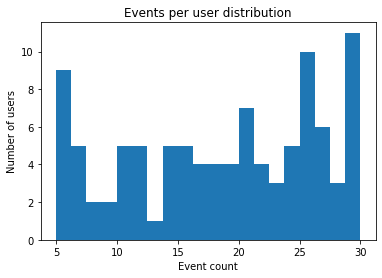

In [12]:
events_per_user = events.groupby('user_id').size()

print(events_per_user.describe())

plt.hist(events_per_user, bins=20)
plt.title("Events per user distribution")
plt.xlabel("Event count")
plt.ylabel("Number of users")
plt.show()


## 注册用户按日期统计的时间趋势

根据 `signup_date` 统计每天的新注册用户数量，并绘制折线图。


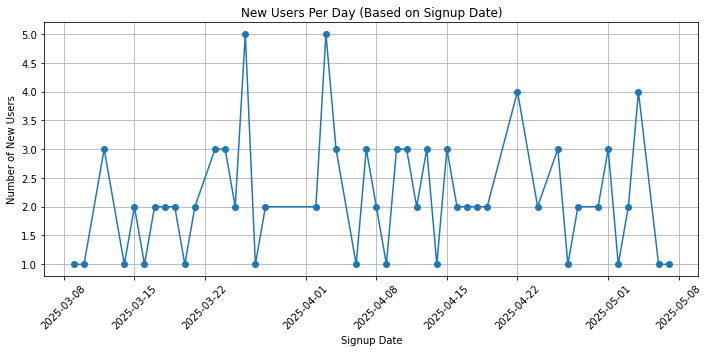

signup_date
2025-03-09    1
2025-03-10    1
2025-03-12    3
2025-03-14    1
2025-03-15    2
dtype: int64

In [13]:
# 按 signup_date 统计每天的新注册用户数量
users_per_day = users.groupby(users['signup_date'].dt.date).size()

plt.figure(figsize=(10, 5))
users_per_day.plot(kind='line', marker='o')
plt.title("New Users Per Day (Based on Signup Date)")
plt.xlabel("Signup Date")
plt.ylabel("Number of New Users")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

users_per_day.head()


## 6. 本部分小结（Part 1 总结）

本节对 `users.csv` 与 `events.csv` 进行了数据清洗与探索性分析，得到以下结论：

###  数据质量
- 两个数据表均无明显缺失值或重复值，整体质量较高。
- `signup_date` 与 `timestamp` 字段已成功统一转换为日期时间格式。
- 年龄字段范围合理（18 至 63 岁），无异常极端值。

###  用户画像
- **年龄分布**主要集中在 20–40 岁区间，呈现轻微右偏趋势。
- **性别分布**以 Male 与 Female 为主，Other 占比较低。
- 用户群体以年轻到中青年为主，结构较为健康。

###  行为数据特征
- 常见事件类型包括：`login`、`logout`、`view_content`、`click_ad`、`purchase` 等。
- 其中 `view_content`、`login` 类事件次数最多，属于平台主要使用行为。

###  活跃趋势分析
- 按天统计的事件数量整体呈稳定趋势，部分日期存在轻微波动。
- 按用户统计事件数量呈现 **典型的长尾分布**：多数用户事件数量较少，少部分核心用户非常活跃。

这些分析结果为 Part 2（SQL 分析）和 Part 3（可选建模）提供了清晰的数据理解基础。

